In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from networkx import grid_graph, hexagonal_lattice_graph
import numpy.ma as ma


## Функция отрисовки

In [2]:
def check_statistics(statistics):
    if len(statistics) >= 2:
        st_keys = sorted(list(statistics.keys()))
        if (statistics[st_keys[-1]]['black'] == statistics[st_keys[-2]]['black']) or (statistics[st_keys[-2]]['white'] == statistics[st_keys[-1]]['white']):
            return True
    return False


In [3]:
def draw(graph, color_marix, i=0):
    pos = nx.kamada_kawai_layout(graph)
    plt.figure(i, figsize=(10, 10))
    nx.draw(graph,
            pos,
            node_color='orange',
            node_size=400,
            with_labels=True)
    colored_nodes = np.where(color_marix == 1)
    colored_nodes = list(zip(colored_nodes[0], colored_nodes[1]))
    if len(colored_nodes) > 0:
        nx.draw_networkx_nodes(graph,
                               pos,
                               nodelist=colored_nodes,
                               node_size=400,
                               alpha=0.7,
                               linewidths=4,
                               node_color="red")

## Функция изменения

In [4]:
# color_marix -начальная цветовая матрица, draw_process - иллюстрировать процесс
def color_graph(graph, color_marix, draw_process=False):
    n, m = color_marix.shape
    k = 0   # количество итераций
    black = color_marix.sum()
    white = color_marix.size - black
    statistics = {k: {'black': black,
                      'white': white}}
    while (white != black+white) and (black != black+white) and not check_statistics(statistics):
        if draw_process:
            draw(graph, color_marix, k)
        k += 1
        color_marix_next = np.full((n,m), 0)
        color_marix_next
        for i in range(n):
            for j in range(m):
                black = 0
                white = 0
                if color_marix[i, j] is not ma.masked:
                    for node in list(graph[(i, j)].keys()):
                        if color_marix[node]:
                            black += 1
                        else:
                            white += 1
                    color_marix_next[i, j] = 1 if black/(black+white) >= 0.5 else 0
        color_marix = color_marix_next
        mask = np.full((n,m), 1)
        for node in graph.nodes:
            mask[node] = 0
        color_marix = ma.masked_array(color_marix, mask=mask)
        black = color_marix.sum()
        white = color_marix.size - black
        statistics[k] = {'black': black,
                          'white': white}
    draw(graph, color_marix, k+1)
    # возвращение статистики
    return statistics


## Создание графа и цветовой матрицы

In [142]:
n =7
m =7
graph = grid_graph(dim=(n, m))
color_marix = np.random.randint(2, size=(n,m))
color_marix

array([[1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1]])

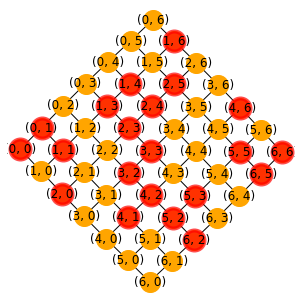

In [143]:
draw(graph, color_marix)

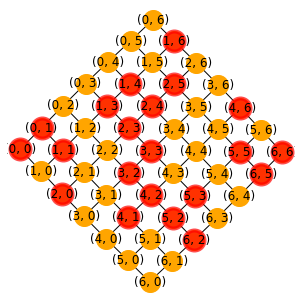

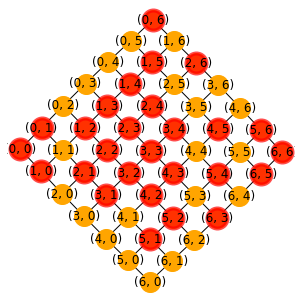

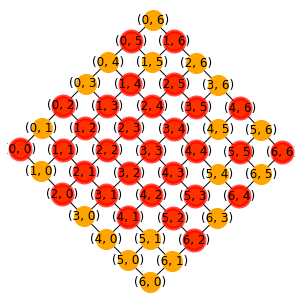

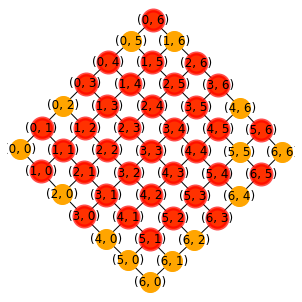

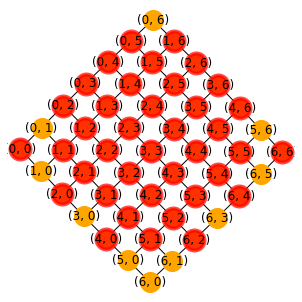

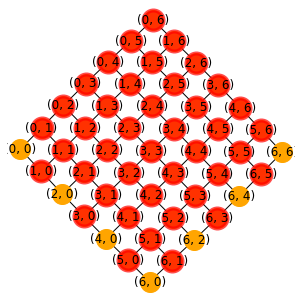

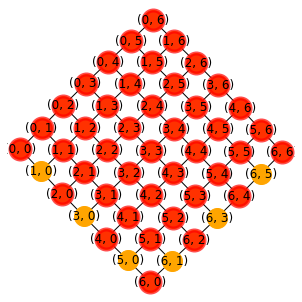

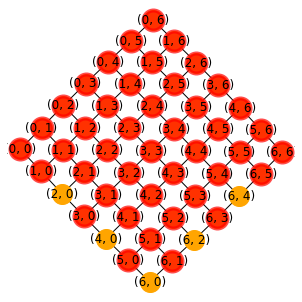

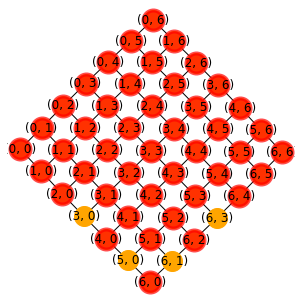

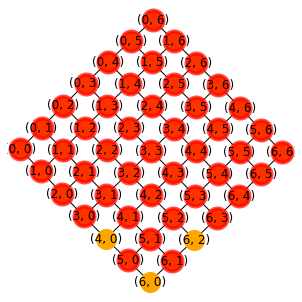

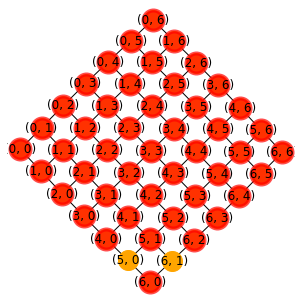

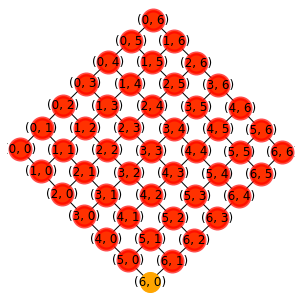

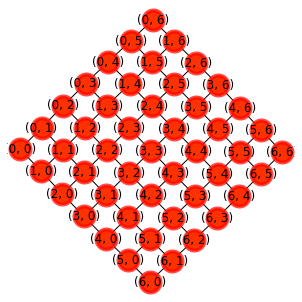

In [144]:
result = color_graph(graph, color_marix, draw_process=True)

## Визуализация статистики

In [146]:
black = []
white = []
for val in result.values():
    black.append(val['black'])
    white.append(val['white'])


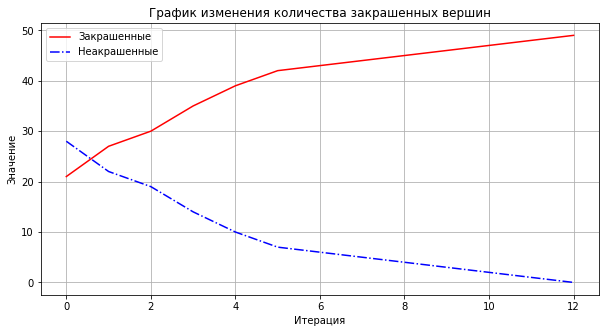

In [147]:
plt.figure(figsize=(10, 5))
plt.xlabel('Итерация')
plt.ylabel('Значение')
plt.title('График изменения количества закрашенных вершин')
plt.grid(True)
plt.plot(result.keys(), black, '-r', label='Закрашенные')
plt.plot(result.keys(), white, '-.b', label='Неакрашенные')
plt.legend(loc='best')
plt.show()


Граф закрашен за 12 итераций

# Домашнее задание

## Создание графа и цветовой матрицы 

In [9]:
n =5
m =5
graph = hexagonal_lattice_graph(n, m)
color_marix = np.random.randint(2, size=(n+1,m*2+2))
mask = np.full((n+1,m*2+2), 1)
for node in graph.nodes:
    mask[node] = 0
color_marix_masked = ma.masked_array(color_marix, mask=mask)

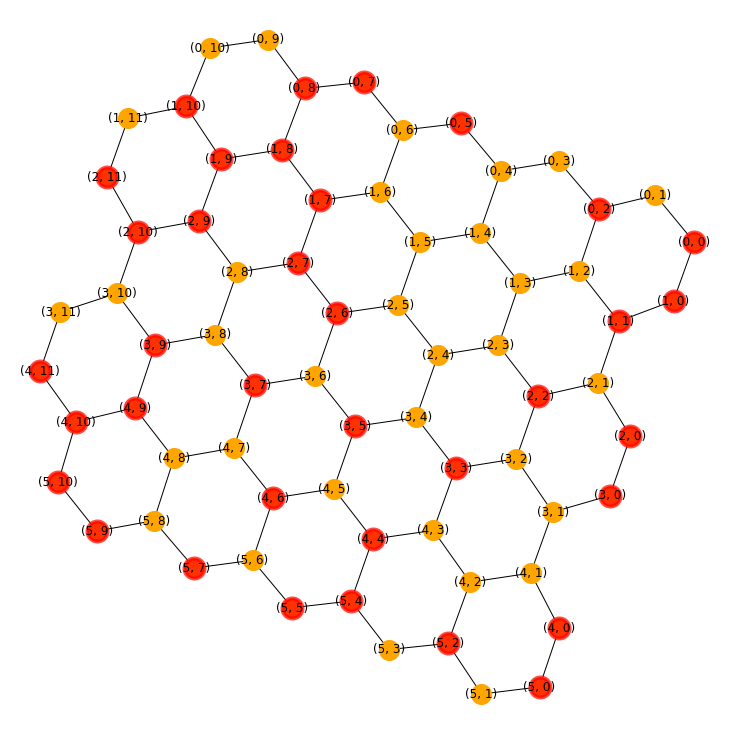

In [10]:
draw(graph, color_marix_masked)

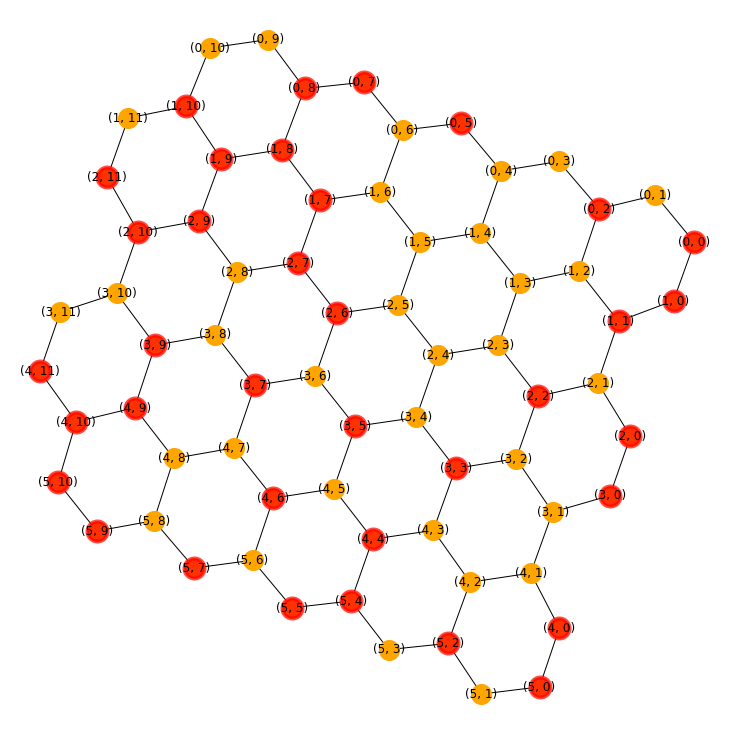

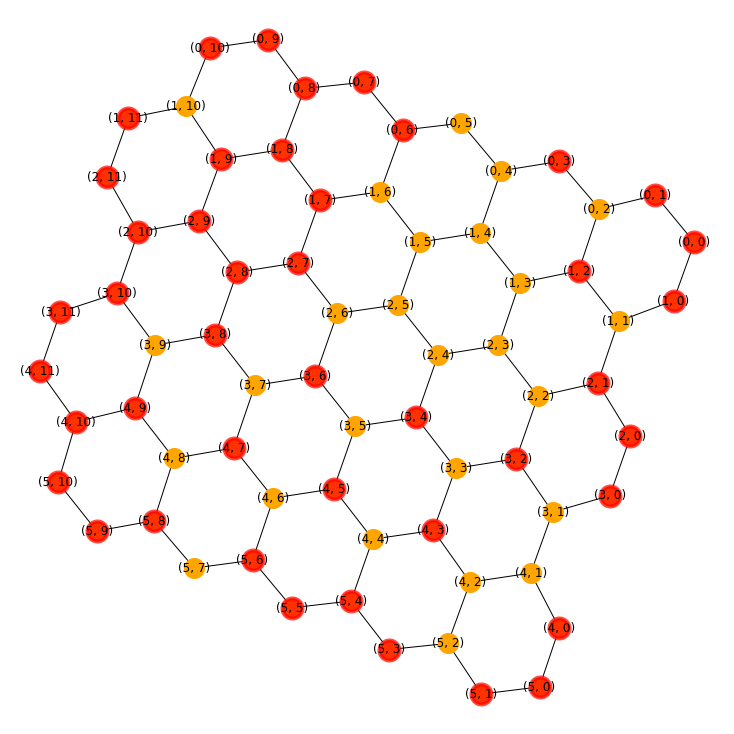

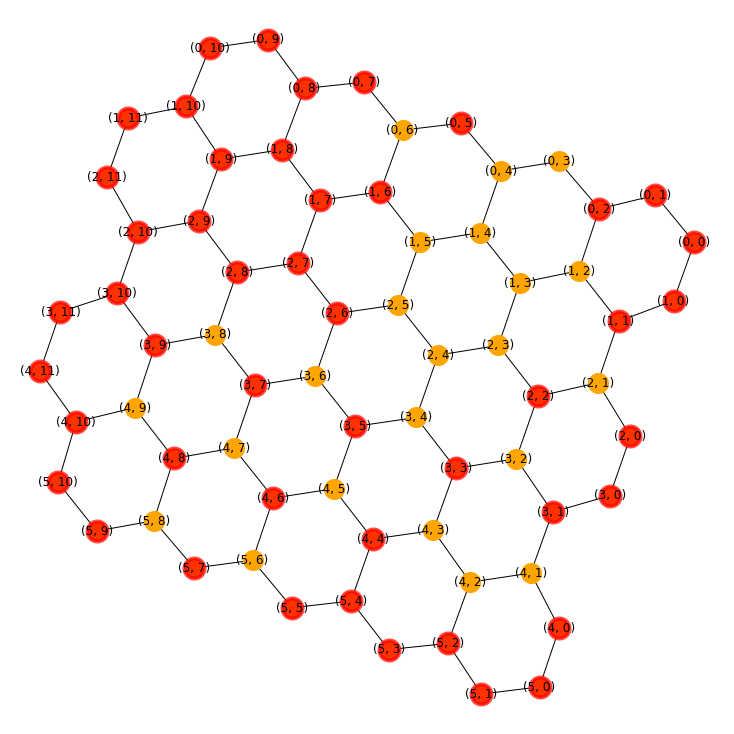

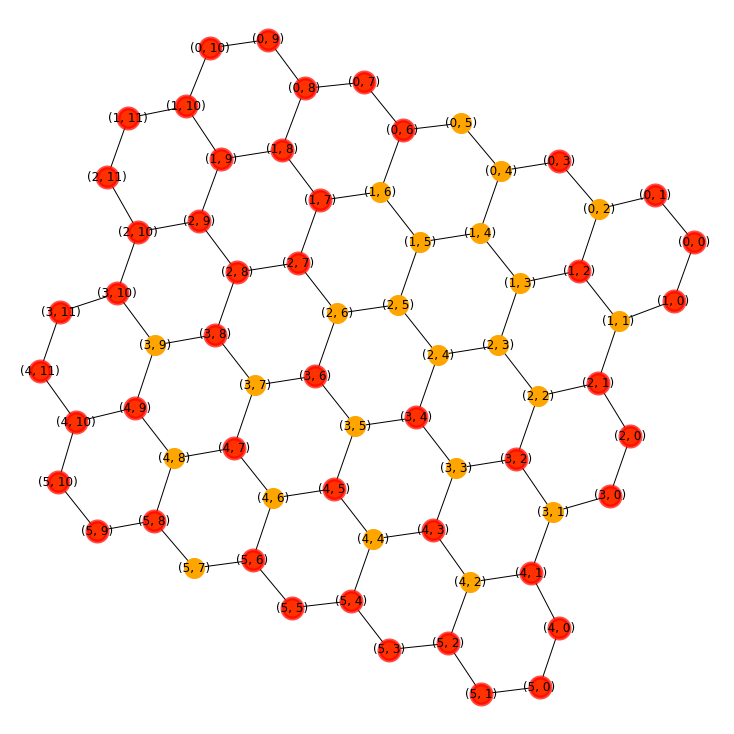

In [11]:
result_hex = color_graph(graph, color_marix_masked, draw_process=True)

## Визуализация статистики

In [12]:
black = []
white = []
for val in result_hex.values():
    black.append(val['black'])
    white.append(val['white'])


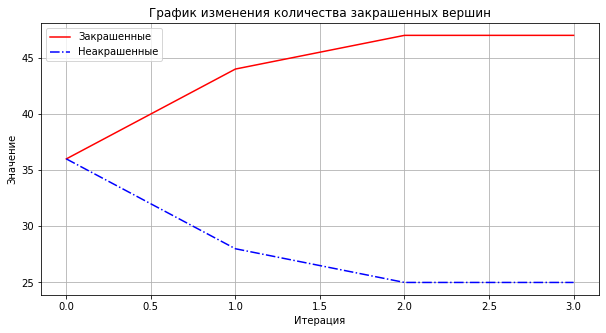

In [13]:
plt.figure(figsize=(10, 5))
plt.xlabel('Итерация')
plt.ylabel('Значение')
plt.title('График изменения количества закрашенных вершин')
plt.grid(True)
plt.plot(result_hex.keys(), black, '-r', label='Закрашенные')
plt.plot(result_hex.keys(), white, '-.b', label='Неакрашенные')
plt.legend(loc='best')
plt.show()


В данном примере граф "мигает"